In [105]:
import pandas as pd
import numpy as np
import requests
import json
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering Data

1. reading csv

In [106]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv', sep=',')

2. Image prediction data

In [107]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [108]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Tweeter retweet data

In [109]:
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)
        

In [110]:
tweets_df = pd.DataFrame(tweets_list)

### Assessing Data

In [111]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [112]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [113]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [114]:
twitter_archive.rating_numerator.value_counts().head()

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [115]:
print(twitter_archive.doggo.value_counts())
print()
print(twitter_archive.floofer.value_counts())
print()
print(twitter_archive.pupper.value_counts())
print()
print(twitter_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [116]:
twitter_archive.retweeted_status_id.notnull().sum()


181

In [117]:
twitter_archive.in_reply_to_status_id.notnull().sum()


78

In [118]:
twitter_archive.duplicated().sum()

0

In [119]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420639486877696
1,33819,6514,892177413194625024
2,25461,4328,891815175371796480
3,42908,8964,891689552724799489
4,41048,9774,891327551943041024


In [120]:
tweets_df.duplicated().sum()

0

In [121]:
tweets_df.retweet_count[-10:]

2344     61
2345    146
2346    261
2347    879
2348     60
2349     41
2350    147
2351     47
2352     48
2353    532
Name: retweet_count, dtype: int64

In [122]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [123]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [124]:
image_predictions.duplicated().sum()

0

In [125]:
image_predictions.p1.value_counts().head()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

#### Quality
1) twitter_archive table
- 'name' is all written by the string including Nones
- 'name' sometimes do not have the right name i.e. "a"
- 'doggo' 'floofer'	'pupper' 'puppo' are written by string including Nones
- 'rating_numerator' values sometimes have outliers
- 'tweet_id' is integer
- we do not need the tweets beyond August 1st, 2017
- delete unnecessary columns regarding to image_predictions and tweets_df table

2) tweets_df table
- 'tweet_id' is integer

3) image_predictions table
- 'p1' 'p2' 'p3' have lower cases
- 'tweet_id' is integer
- it is easier to read the names of 'p1', 'p2', 'p3' without deliminators

#### Tidiness
- Merge all 3 tables
- Make a new column 'dogs' to show the types of dogs at once

### Cleaning

In [126]:
twitter_archive_clean = twitter_archive.copy()
tweets_df_clean = tweets_df.copy()
image_predictions_clean = image_predictions.copy()

#### Quality

##### Define:
#'name' is all written by the string including Nones

##### Code:

In [127]:
#'name' is all written by the string including Nones
twitter_archive_clean.name.replace("None", "a", inplace=True)
twitter_archive_clean.name.tail()

2351    a
2352    a
2353    a
2354    a
2355    a
Name: name, dtype: object

In [128]:
#'name' sometimes do not have the right name i.e. "a"
bad_names = twitter_archive_clean[twitter_archive_clean['name'].str.islower()]
bad_names = bad_names['name'].unique()
bad_names

array(['a', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [129]:
#replace values equals to invalid names with none
twitter_archive_clean['name'].replace(bad_names, np.nan, inplace=True)

##### Test:

In [130]:
twitter_archive_clean.name.tail()

2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: name, dtype: object

##### Define:
#'doggo' 'floofer' 'pupper' 'puppo' are written by string including Nones

##### Code:

In [131]:
#'doggo' 'floofer' 'pupper' 'puppo' are written by string including Nones
twitter_archive_clean.doggo.replace("None", np.nan, inplace=True)
twitter_archive_clean.floofer.replace("None", np.nan, inplace=True)
twitter_archive_clean.pupper.replace("None", np.nan, inplace=True)
twitter_archive_clean.puppo.replace("None", np.nan, inplace=True)

##### Test:

In [132]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

##### Define:
#'rating_numerator' values sometimes have outliers

##### Code:

In [133]:
#'rating_numerator' values sometimes have outliers
twitter_archive_clean.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [134]:
IQR = 12-10
Lower_Outlier = 10 - (1.5*IQR)
Higher_Outlier = 12 + (1.5*IQR)
print(Lower_Outlier)
print(Higher_Outlier)

7.0
15.0


In [135]:
#Using the Outlier Formula, we omit the outliers(<7.0 or >15.0) as None and make a new clean column 'rating_numerator_clean'
twitter_archive_clean['rating_numerator'] = twitter_archive_clean.query('rating_numerator > 6 & rating_numerator < 16').rating_numerator

##### Test:

In [136]:
twitter_archive_clean['rating_numerator'].value_counts()

12.0    558
11.0    464
10.0    461
13.0    351
9.0     158
8.0     102
7.0      55
14.0     54
15.0      2
Name: rating_numerator, dtype: int64

##### Define:
#switching the dtype of 'tweet_id' in twitter_archive table

##### Code:

In [137]:
#switching the dtype of 'tweet_id' in twitter_archive table
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

##### Test:

In [138]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2205 non-null float64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(5), int64(1), object

##### Define:
#switching the dtype of 'tweet_id' in tweets_df table

##### Code:

In [139]:
#switching the dtype of 'tweet_id' in tweets_df table
tweets_df_clean.tweet_id = tweets_df_clean.tweet_id.astype(str)

##### Test:

In [140]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


##### Define:
#'p1', 'p2', 'p3' have lower cases in image_predictions table

##### Code:

In [141]:
#'p1', 'p2', 'p3' have lower cases in image_predictions table
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

##### Test:

In [142]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define:
#switching the dtype of 'tweet_id' in image_predictions table

##### Code:

In [143]:
#switching the dtype of 'tweet_id' in image_predictions table
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

##### Test:

In [144]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define:
#we do not need the tweets beyond August 1st, 2017

##### Code:

In [145]:
#we do not need the tweets beyond August 1st, 2017
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp, format="")
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2205 non-null float64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns](1), f

##### Test:

In [146]:
#There has already been sorted by August 1st, 2017
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Define:
#it is easier to read the names of 'p1', 'p2', 'p3' without deliminators

##### Code:

In [147]:
#it is easier to read the names of 'p1', 'p2', 'p3' without deliminators
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.split('_')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.split('_')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.split('_')

##### Test:

In [148]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"[Welsh, Springer, Spaniel]",0.465074,True,[Collie],0.156665,True,"[Shetland, Sheepdog]",0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,[Redbone],0.506826,True,"[Miniature, Pinscher]",0.074192,True,"[Rhodesian, Ridgeback]",0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"[German, Shepherd]",0.596461,True,[Malinois],0.138584,True,[Bloodhound],0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,"[Rhodesian, Ridgeback]",0.408143,True,[Redbone],0.360687,True,"[Miniature, Pinscher]",0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,"[Miniature, Pinscher]",0.560311,True,[Rottweiler],0.243682,True,[Doberman],0.154629,True


##### Define:
#delete unnecessary columns regarding to image_predictions and tweets_df table

##### Code:

In [149]:
#delete unnecessary columns regarding to image_predictions and tweets_df table
twitter_archive_clean = twitter_archive_clean[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

##### Test:

In [150]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,NaN,NaN,NaN


#### Tidiness

##### Define
#We need the new combined DataFrames to 'twitter_archive_master'

##### Code

In [151]:
#Merge three DataFrames to 'twitter_archive_master'
twitter_image = pd.merge(twitter_archive_clean, image_predictions_clean)
tweets_df_clean['tweet_id_retweet'] = tweets_df_clean['tweet_id']
twitter_archive_master = pd.merge(twitter_archive_clean, tweets_df_clean, how="outer")

#### Test

In [152]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,tweet_id_retweet
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,NaN,NaN,NaN,NaN,NaN,NaN


##### Define
#make a new column 'dogs' to show the types of dogs at once

##### Code

In [153]:
#make a new column 'dogs' to show the types of dogs at once
twitter_archive_clean['dogs'] = twitter_archive_clean['doggo']
twitter_archive_clean['dogs'] = twitter_archive_clean['dogs'].fillna(twitter_archive_clean['floofer'])
twitter_archive_clean['dogs'] = twitter_archive_clean['dogs'].fillna(twitter_archive_clean['pupper'])
twitter_archive_clean['dogs'] = twitter_archive_clean['dogs'].fillna(twitter_archive_clean['puppo'])

##### Test

In [154]:
twitter_archive_clean['dogs'].value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: dogs, dtype: int64

### Storing

In [155]:
twitter_archive_master.to_csv('twitter_archive_master.csv', sep=',')

### Insights
- According to the rating numerator column, most of the users know that there is no maximum rating system(usually 10 points) and rate more than 10. (visualized data with 'Visualization')




- As we refer the first data below, Yorkshire Terrier with more than one number photos had the highest confident algorithm in the #1 predicion. It means that is is adventageous to apply the algorithm with more than one number of photos with Yorkshire Terrier.

In [156]:
image_predictions_clean.query('p1_dog == True').max()

tweet_id                                   892177421306343426
jpg_url     https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...
img_num                                                     4
p1                                       [Yorkshire, Terrier]
p1_conf                                              0.999956
p1_dog                                                   True
p2                                       [Yorkshire, Terrier]
p2_conf                                              0.467678
p2_dog                                                   True
p3                                                    [Zebra]
p3_conf                                              0.273419
p3_dog                                                   True
dtype: object

- There was a significant relationship between favorite count and retweet counts, having the p-value '0'. As the number of retweet increase one unit, the favorite also increases 1.57.

In [157]:
tweets_df['intercept'] = 1
lm = sm.OLS(tweets_df['favorite_count'], tweets_df[['intercept', 'retweet_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     2297.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        14:22:05   Log-Likelihood:                -24611.
No. Observations:                2354   AIC:                         4.923e+04
Df Residuals:                    2352   BIC:                         4.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      3107.8692    201.951     15.389      0.000    2711.849    3503.889
retweet_count     1.5714      0.033     47.923      0.000       1.507       1.636
==============================================================================
Omnibus:                     1034.735   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42336.254
Skew:                          -1.368   Prob(JB):                         0.00
Kurtosis:                      23.595   Cond. No.                     7.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualization

In [158]:
twitter_archive_clean['rating_numerator'].value_counts()

12.0    558
11.0    464
10.0    461
13.0    351
9.0     158
8.0     102
7.0      55
14.0     54
15.0      2
Name: rating_numerator, dtype: int64

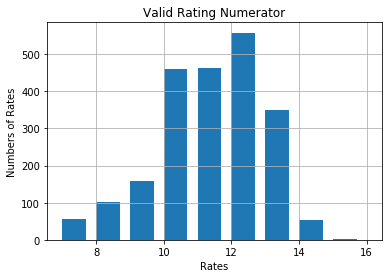

In [159]:
twitter_archive_clean['rating_numerator'].hist(bins = np.arange(7,17,1), width=0.7)
plt.title("Valid Rating Numerator")
plt.xlabel("Rates")
plt.ylabel("Numbers of Rates")
plt.show()

- As most of the rates for the posts are positioned between 10 and 13, most of the users tend to give more than 10 points (when it is usually easy to think that the maximum rate would be out of 10).
- we can understand how generously the users rate the posts.